In [1]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [2]:
#Create the dataframe from de CSV file
df=pd.read_csv('predictions.csv')

In [3]:
df.head()

,Unnamed: 0,Prediction_rf,Malignancy,Prediction_knn,Prediction_dt
0,0,True,True,True,True
1,1,True,True,True,True
2,2,False,False,False,False
3,3,True,True,True,True
4,4,True,True,True,True


In [4]:
df.columns

Index(['Unnamed: 0', 'Prediction_rf', 'Malignancy', 'Prediction_knn',
       'Prediction_dt'],
      dtype='object')

In [5]:
# Identify the features used to predict the classification of the malignancy of the node
# X - vector of valiables used to predict
# y - target variable

X=df[['Prediction_dt', 'Prediction_rf', 'Prediction_knn']]
y=df['Malignancy']

In [6]:
# Devide the dataset in train (80%) and test (20%) subsets
# Define a random state do fix this division

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [7]:
# Construction of a decision tree classifier with the stop criterion of 
# at least 0.001 of minimum impurity decrease to avoind overfitting

dt = tree.DecisionTreeClassifier(min_impurity_decrease=0.0001)
dt = dt.fit(X_train, y_train)
df['Prediction_dt']=dt.predict(X)

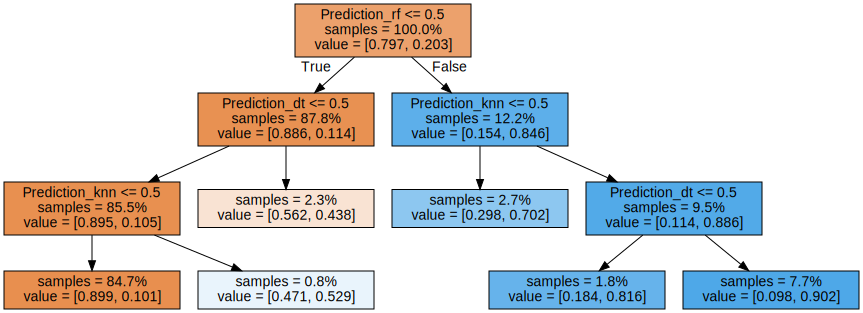

In [8]:
# print of the more significant separations with percentage of the subset (train) and proportion for each separation

dt_data = export_graphviz(dt,feature_names=X_train.columns,filled=True,max_depth=4,impurity=False,proportion=True)
graph = graphviz.Source(dt_data)
display(graph)

In [9]:
# test of the decision tree obtained using the test subset
y_predict=dt.predict(X_test)

print("Confusion Matrix:")
confusion_matrix(y_test, y_predict)

Confusion Matrix:


array([[389,  19],
       [ 56,  67]])

In [10]:
print("Accuracy:")
accuracy_score(y_test, y_predict)

Accuracy:


0.8587570621468926

In [ ]:
# The obtained result is a little higher than the results of each model